ARUTLA SIDDHARTH REDDY

GRIP-(THE SPARK FOUNDATION)

TASK-1: PREDICTION USING SUPERVISED ML

IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

STEP-1:READING THE DATASET

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data imported successfully")
dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


THE FIRST FIVE ELEMENTS IN THE DATASET:

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


SUMMARY OF THE DATASET:

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


NUMBER OF ROWS AND COLUMNS

In [6]:
dataset.shape

(25, 2)

STEP-2:DATA VISUALIZATION

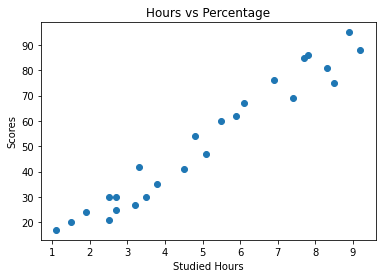

In [7]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

STEP-3:TRAINING OF MODEL

In [8]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

TRAINING THE SIMPLE LINEAR REGRESSION MODEL ON THE TRAINING SET

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

STEP-4:PLOTTING

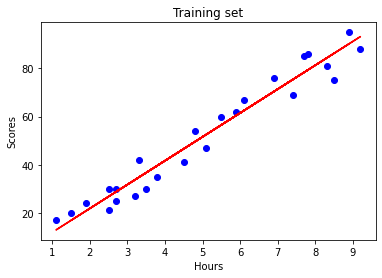

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.title("Training set");
plt.ylabel('Scores')
plt.xlabel('Hours')  
plt.scatter(X, y,color="blue")
plt.plot(X, line,color="red");
plt.show()

STEP-5:PREDICTING AND COMPARING

In [12]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
print('Training score :', regressor.score(X_train, y_train))
print('Test score :', regressor.score(X_test, y_test))

Training score : 0.9515510725211552
Test score : 0.9454906892105354


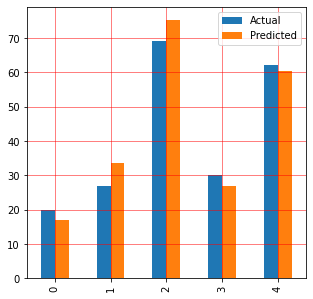

In [15]:
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='yellow')
plt.show()

In [16]:
Hours= 9.25
test=np.array([Hours])
test=test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


STEP-6: FINAL STEP

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
print('R-2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354
